In [14]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
model = tf.keras.models.load_model("facefeatures_model_vgg16.h5")

In [16]:
label=['angry',
 'disgust',
 'disregard',
 'fear',
 'happy',
 'neutral',
 'sorrow',
 'surprise']

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  
    img_array = image.img_to_array(img)  
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0 
    return img_array

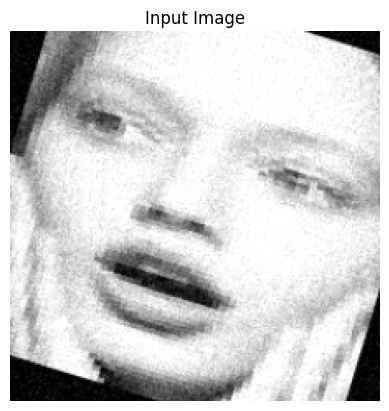

1/1 [==============================] - 0s 48ms/step
Predicted Class: surprise


In [25]:
src_path = "436.png"
image_cv = cv2.imread(src_path)  
image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

plt.imshow(image_cv)
plt.axis("off")
plt.title("Input Image")
plt.show()

img_array = preprocess_image(src_path)

pred = model.predict(img_array)
predicted_class = np.argmax(pred)
print("Predicted Class:", label[predicted_class])

1/1 [==============================] - 0s 22ms/step


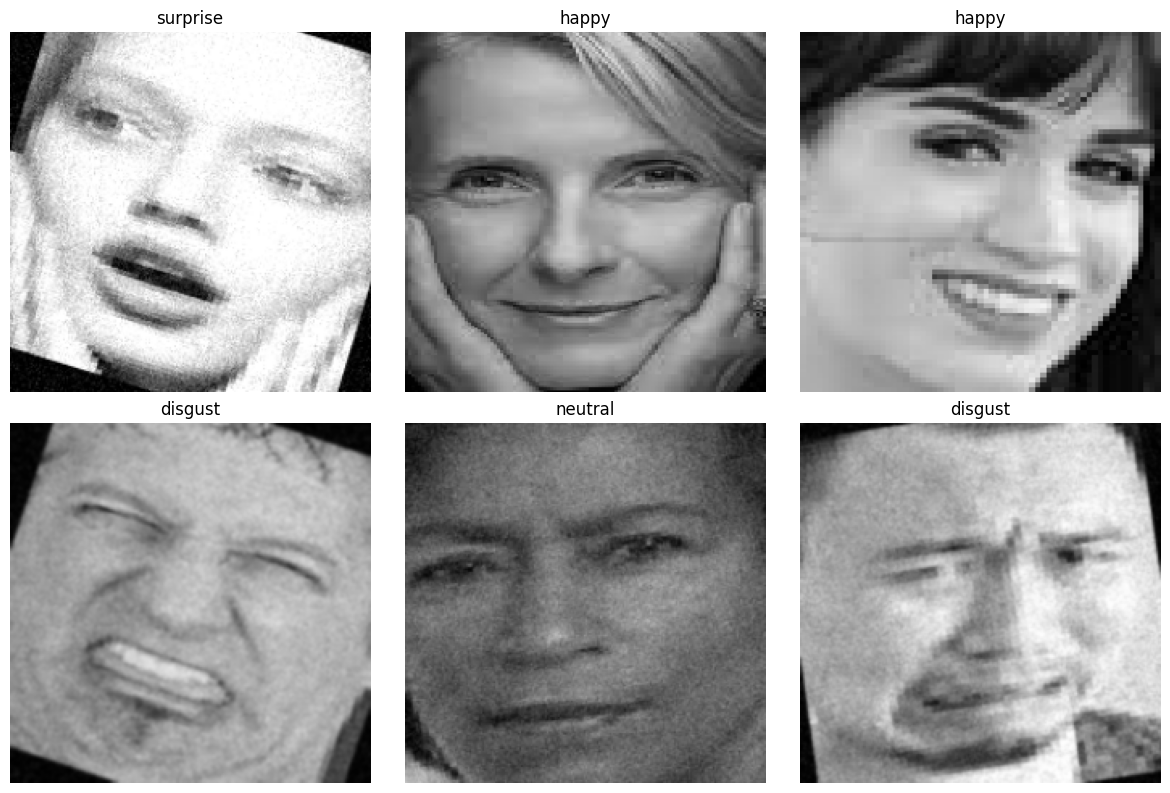

In [26]:
image_paths = ["436.png", "424.png","460.png","2039.png","2315.png","1497.png"]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, img_path in enumerate(image_paths):
    image_cv = cv2.imread(img_path)  
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    ax = axes[i // 3, i % 3] 

    img_array = preprocess_image(img_path)
    pred = model.predict(img_array)
    predicted_class = np.argmax(pred)
    predicted_label = label[predicted_class] 

    ax.imshow(image_cv)
    ax.axis("off")
    ax.set_title(predicted_label)  

plt.tight_layout()
plt.show()